## **Transit Method**

Kepler-6 \\

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [151]:
from astropy.io import fits as fo
from astropy.convolution import convolve, Box1DKernel
import matplotlib.pyplot as plt
import numpy as np
from astropy.timeseries import LombScargle, BoxLeastSquares
from scipy.optimize import curve_fit
from astropy.stats import sigma_clipped_stats as scs
from astropy.convolution import convolve, Box1DKernel, Gaussian1DKernel as gk
#plt.style.use('dark_background')

In [154]:
f1 = fo.open('gdrive/My Drive/Exoplanet/transit3.fits')
f1.info()
d = f1[1].data

Filename: gdrive/My Drive/Exoplanet/transit3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      58   ()      
  1  LIGHTCURVE    1 BinTableHDU    161   4573R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        48   (8, 9)   int32   


In [191]:
f1 = fo.open('gdrive/My Drive/Exoplanet/TESS3.fits')
f1.info()
d = f1[1].data

Filename: gdrive/My Drive/Exoplanet/TESS3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   20309R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   


In [184]:
d

FITS_rec([(2743.99242263, 0.00147353, 1091906,       nan,      nan,       nan,       nan,       nan,       nan, 168, nan, nan, nan, nan,           nan,        nan,           nan,        nan,        nan,         nan),
          (2743.99381155, 0.00147357, 1091907,       nan,      nan,       nan,       nan,       nan,       nan,  32, nan, nan, nan, nan,           nan,        nan,           nan,        nan,        nan,         nan),
          (2743.99520047, 0.0014736 , 1091908,       nan,      nan,       nan,       nan,       nan,       nan,  32, nan, nan, nan, nan,           nan,        nan,           nan,        nan,        nan,         nan),
          ...,
          (2768.97761906, 0.00195956, 1109895, 4710.092 , 8.360337, 599.2011 , 2.4332967, 5476.4453, 10.727811,   0, nan, nan, nan, nan, 1977.86667443, 0.00118325, 1948.36662611, 0.00115106, 0.01239424, -0.03554811),
          (2768.97900797, 0.00195958, 1109896, 4734.6616, 8.375852, 600.00275, 2.4297726, 5505.9785, 10.747719,   0, 

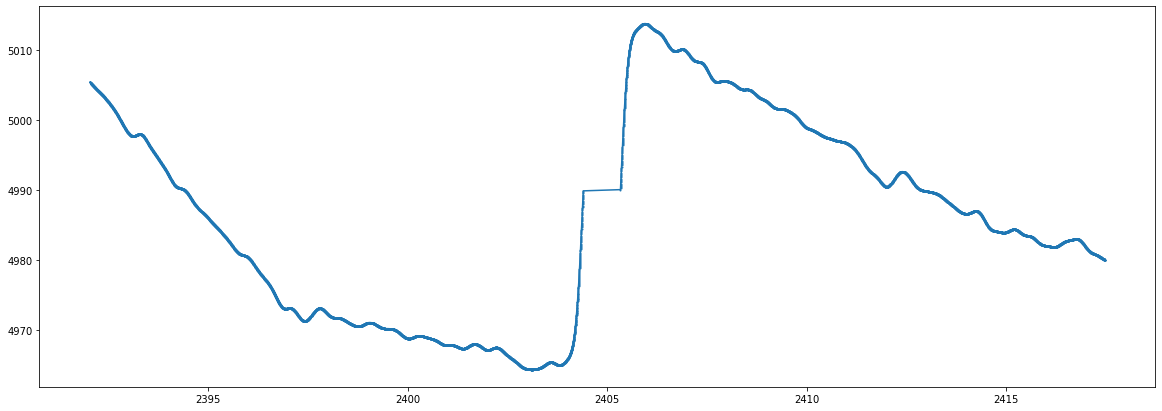

In [192]:
n = 100

t = d.field(0)
y = d.field(3)
t = t[np.where(~np.isnan(y))]
y = y[np.where(~np.isnan(y))]
y = convolve(y, gk(n))
n = 10*n
plt.figure(figsize=(20,7))
tnew = t[n:len(t)-n]
ynew = y[n:len(t)-n]
plt.scatter(tnew, ynew,s=1)
plt.plot(tnew, ynew)
plt.show()

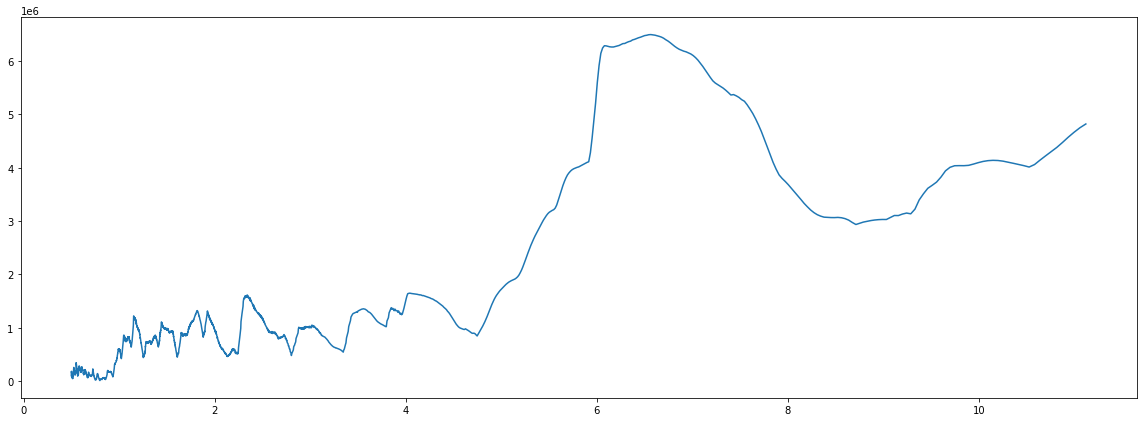

[6.56624832]


In [175]:
'''f1 = open('gdrive/My Drive/Exoplanet/Kepler6.txt')
t=[]
y=[]
dy=[]


for i in f1.readlines():
  l = i.split()
  t.append(float(l[0]))
  y.append(float(l[1]))
  dy.append(float(l[2]))
tnew = t
ynew = y'''


plt.figure(figsize=(20,7))
gram = BoxLeastSquares(tnew, ynew, dy=0.1).autopower(0.25
                                                     )
'''
k = BoxLeastSquares(t,y).autopower(1.5)
frequency = k.period
power = k.power'''
plt.plot(gram.period,gram.power)
plt.show()
print(gram.period[np.where(gram.power == np.max(gram.power))])

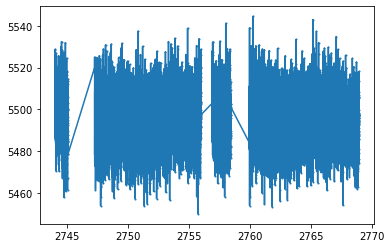

In [159]:
n = 50

t = d.field(0)
y = d.field(7)
t = t[np.where(~np.isnan(y))]
y = y[np.where(~np.isnan(y))]
y = convolve(y, gk(n))
n = 10*n
plt.figure(figsize=(20,7))
tnew = t[n:len(t)-n]
ynew = y[n:len(t)-n]'''
plt.scatter(t, y,s=1)
plt.plot(t, y)
plt.show()

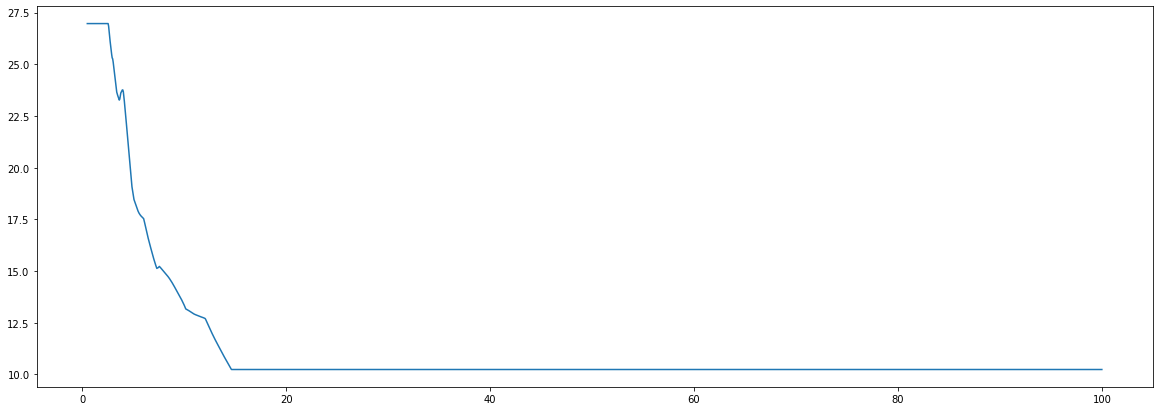

In [176]:
#days = np.concatenate((np.linspace(0.01,100,10000),np.flip(np.reciprocal(np.linspace(0.00025,0.0100,9976)))))
told = t
yold = y

t = tnew
y = ynew

days = np.linspace(0.5,100,2000)
freqs = np.reciprocal(days)

c, med, std = scs(y)
dip = c - np.min(y)
offset = np.array(t)[np.where(np.array(y) < c - 0.9*dip)][0]
start = list(t).index(offset)

for i in range(start,len(t)):
  if y[i] > c - 0.9*dip:
    T0 = t[i] - offset
    break

def per(x):
  #freq = 0.002
  return c - 0.8*dip*(1 - np.sign(np.floor(((x-offset)%day)/T0)))

mmse = []
for j in days:
  day = j
  #params, covs = curve_fit(per, t, y)#, bounds = ([-1000,-1000,0.001],[1000,1000,1.1]))
  sumsquares = 0
  fits = [per(i) for i in t]
  for n in range(len(t)):
    sumsquares += (fits[n] - y[n])**2
  mmse.append(sumsquares)

#days[np.where(mmse == np.min(mmse))]
plt.figure(figsize=(20,7))
plt.plot(days,np.array(mmse)/1000000)
#plt.ylim(0,0.1)
plt.show()

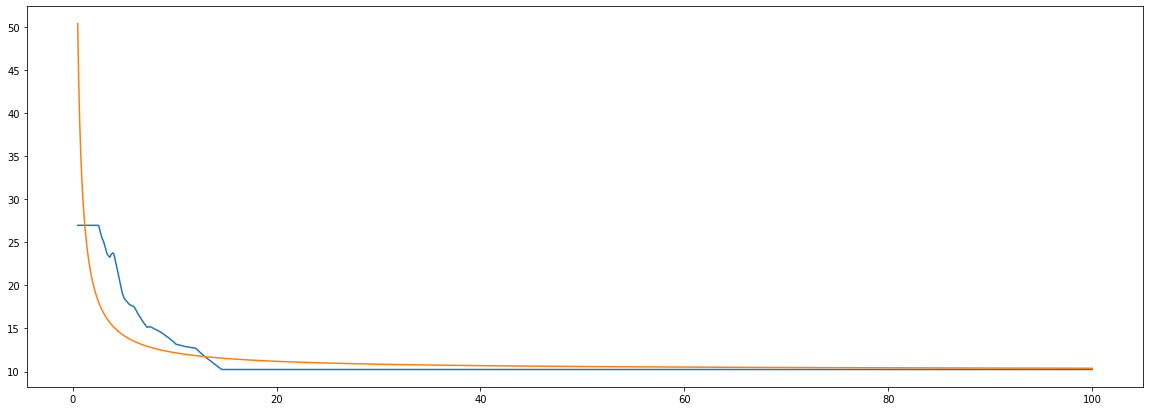

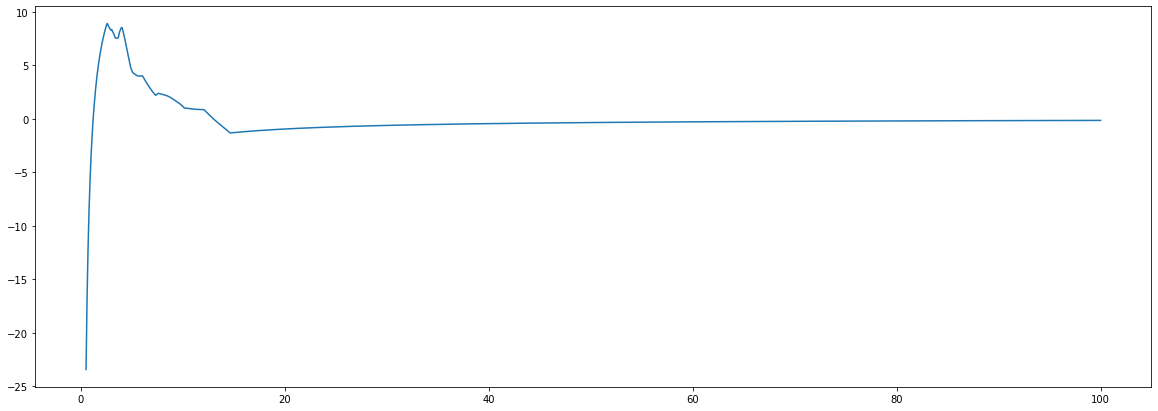

array([0.5])

In [177]:
def e(x, A, k):
  #return A*np.exp(-k*x)
  return A/x + k

p, cov = curve_fit(e, days, np.array(mmse)/1000000)
plt.figure(figsize=(20,7))
plt.plot(days,np.array(mmse)/1000000)
plt.plot(days, e(days, p[0], p[1]))
plt.show()

plt.figure(figsize=(20,7))
diff = np.array(mmse)/1000000 - e(days, p[0], p[1])
plt.plot(days, diff)
#plt.ylim(0,0.1)
plt.show()
days[np.where(diff == np.min(diff))]

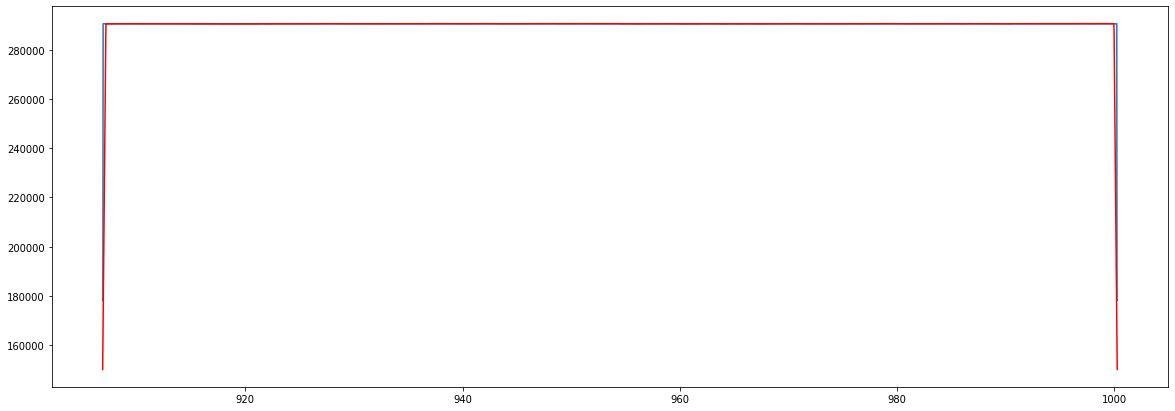

In [112]:
plt.figure(figsize = (20,7))
day = days[np.where(mmse == np.min(mmse))]
curve = [per(i) for i in t]
plt.plot(t,curve)
plt.plot(t,y,color='r')
plt.show()

In [142]:
def fourier(t, y, f):
  s = 0
  for i in range(len(t)):
    s += (y[i]-c)*np.sin(2*np.pi*f*t[i])
  return s

In [143]:
amps = [fourier(t, y, j) for j in freqs]

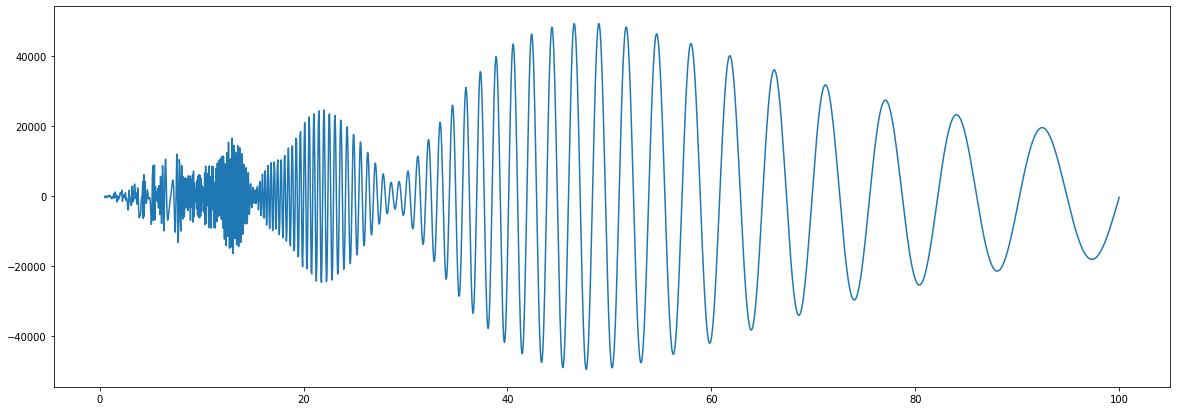

In [144]:
plt.figure(figsize=(20,7))
plt.plot(days,amps)
#plt.xlim(0,0.01)
plt.show()

In [145]:
fmax = freqs[np.where(amps == np.min(amps))]
days[np.where(np.abs(amps) == np.max(np.abs(amps)))]

array([47.73636818])